# <span style="color: black;">Comprehensive Dataset Overview</span>



<span style="color: black;">
This dataset encapsulates detailed information on 301 vehicles across 9 critical attributes, offering a rich source for analyzing factors that influence car pricing in the pre-owned vehicle market. The data structure is as follows:

<span style="color: black ; font-weight: bold;">Car_Name 🚗: </span>The make and model of the vehicle (categorical).</br>
<span style="color: black ; font-weight: bold;">Year 📅:</span> The manufacturing year of the vehicle (numerical), a key determinant of depreciation.</br>
<span style="color: black ; font-weight: bold;">Selling_Price 💰:</span> The final transaction price (target variable, numerical), serving as the dependent variable for predictive analysis.</br>
<span style="color: black ; font-weight: bold;">Present_Price 📈:</span> The current market price (numerical), acting as a pivotal independent variable influencing selling price.</br>
<span style="color: black ; font-weight: bold;">Kms_Driven 🚙:</span> The total kilometers driven (numerical), directly correlating to the car’s wear and perceived value.</br>
<span style="color: black ; font-weight: bold;">Fuel_Type ⛽:</span> Type of fuel (categorical: Petrol, Diesel, CNG), influencing cost of ownership and market demand.</br>
<span style="color: black ; font-weight: bold;">Seller_Type 👤:</span> Categorical variable indicating whether the seller is an individual or dealer, impacting the sales strategy and perceived trustworthiness.</br>
<span style="color: black ; font-weight: bold;">Transmission ⚙️:</span> Gearbox type (categorical: Manual or Automatic), contributing to buyer preferences.</br>
<span style="color: black ; font-weight: bold;">Owner 👥:</span> The number of previous owners (numerical), influencing market perception and potential resale value.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [37]:
data=pd.read_csv(r'C:\Users\Sharare\Desktop\carpro\cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [38]:
car_df=pd.DataFrame(data)
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Clear the machine name column

In [39]:
car_df1= car_df.drop('Car_Name', axis=1)
car_df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [40]:
car_df1.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [41]:
car_df1.isnull().sum()
#didn't have missing values

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

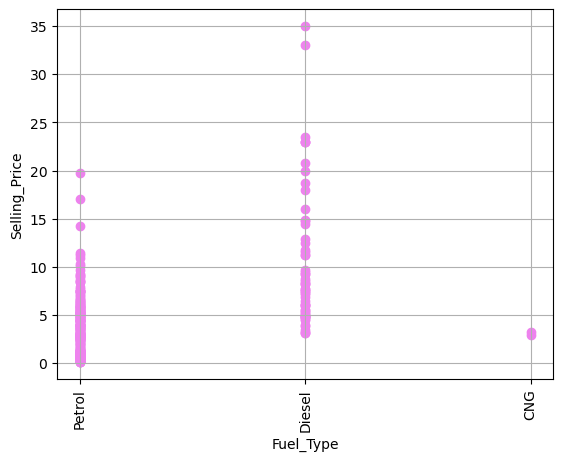

In [42]:
plt.scatter(car_df1["Fuel_Type"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Fuel_Type")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

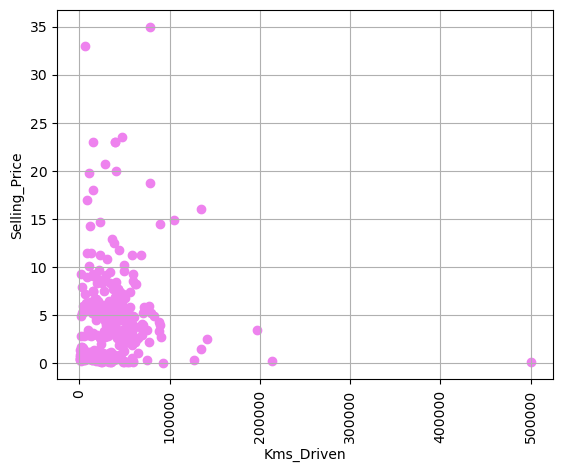

In [43]:
plt.scatter(car_df1["Kms_Driven"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Kms_Driven")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

## It seems that the value of 50000 on the graph is noise 


#     

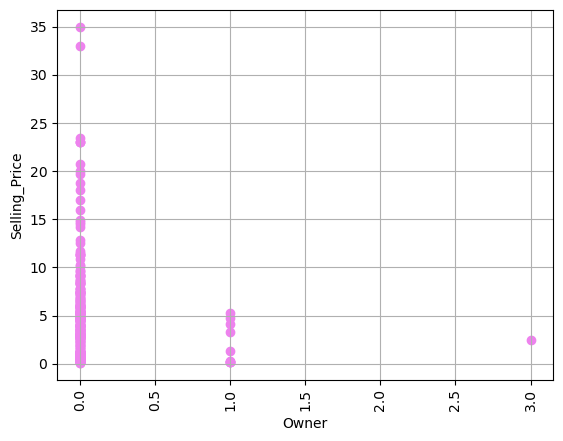

In [44]:
plt.scatter(car_df1["Owner"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Owner")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

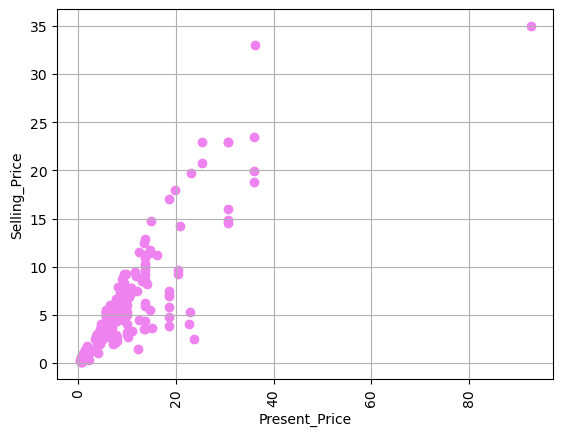

In [45]:
plt.scatter(car_df1["Present_Price"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Present_Price")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

### It seems that the value of 35 on the graph is noise 

#        

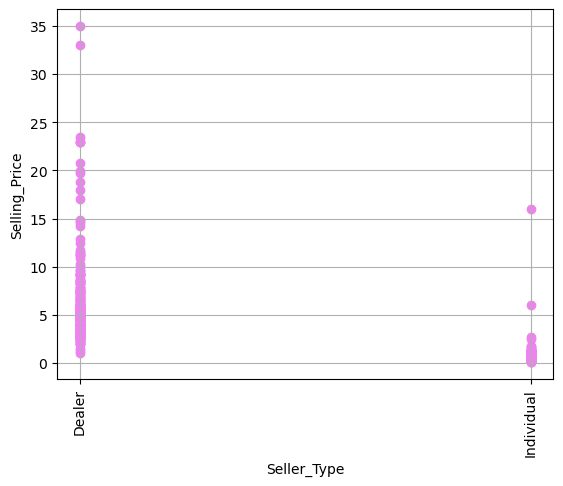

In [46]:
plt.scatter(car_df1["Seller_Type"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Seller_Type")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

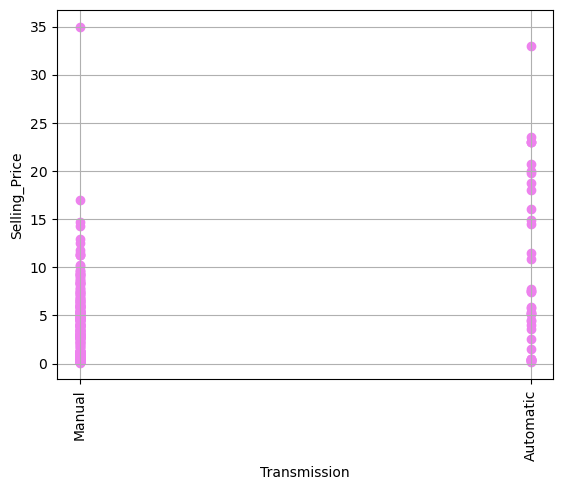

In [47]:
plt.scatter(car_df1["Transmission"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Transmission")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

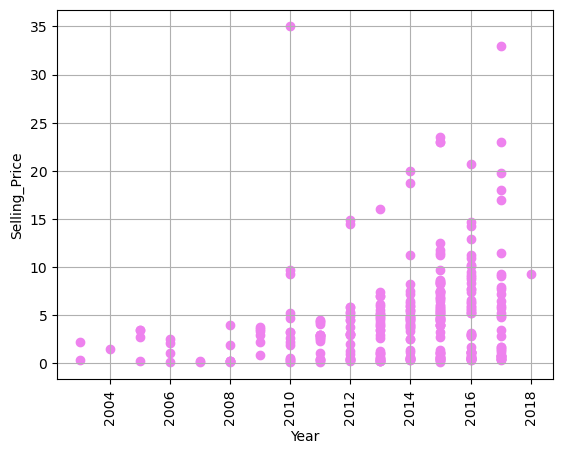

In [48]:
plt.scatter(car_df1["Year"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

In [49]:
car_df1['Year'].max()

2018

In [50]:
car_df1['age'] = 2019-car_df1.Year
car_df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [51]:
#clear year and use age
car_df1=car_df1.drop('Year', axis=1)
car_df1

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


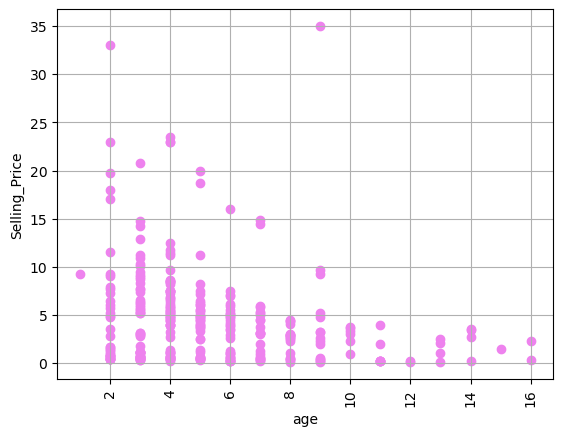

In [52]:
plt.scatter(car_df1["age"] , car_df1["Selling_Price"] , color='violet')
plt.xlabel("age")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

In [53]:
Fuel_Type_Count =car_df1["Fuel_Type"].value_counts()
Fuel_Type_Count

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [54]:
Owner_Count =car_df1["Owner"].value_counts()
Owner_Count

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [55]:
Transmission_Count =car_df1["Transmission"].value_counts()
Transmission_Count

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [56]:
Seller_Type_Count =car_df1["Seller_Type"].value_counts()
Seller_Type_Count

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

# Find Noise

In [57]:
j=car_df1[(car_df1['Selling_Price']>33)].index
j

Index([86], dtype='int64')

In [58]:
car_df2 = car_df1.drop(j)
car_df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


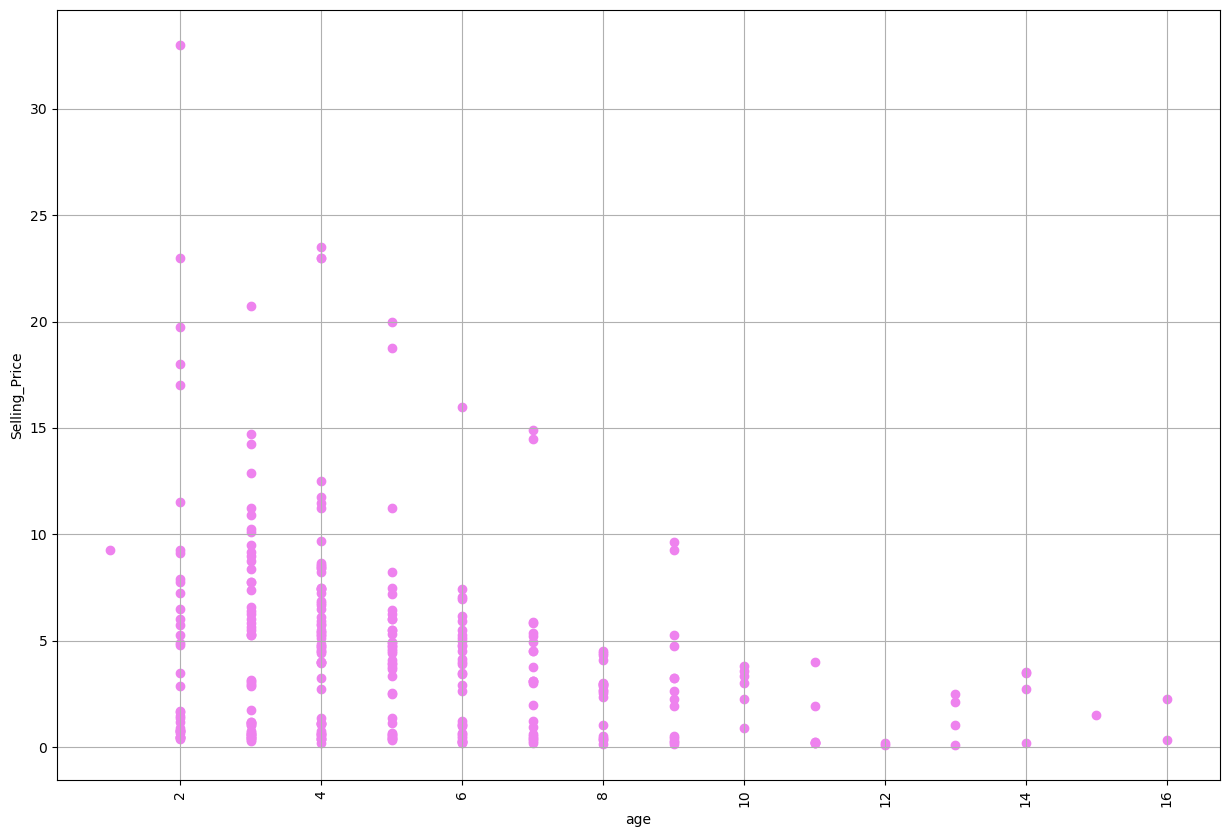

In [59]:
plt.figure(figsize = ( 15 , 10 ))
plt.scatter(car_df2["age"] , car_df2["Selling_Price"] , color='violet')
plt.xlabel("age")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

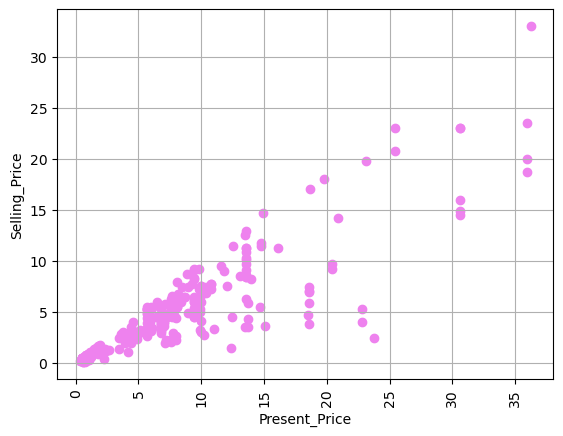

In [60]:
plt.scatter(car_df2["Present_Price"] , car_df2["Selling_Price"] , color='violet')
plt.xlabel("Present_Price")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

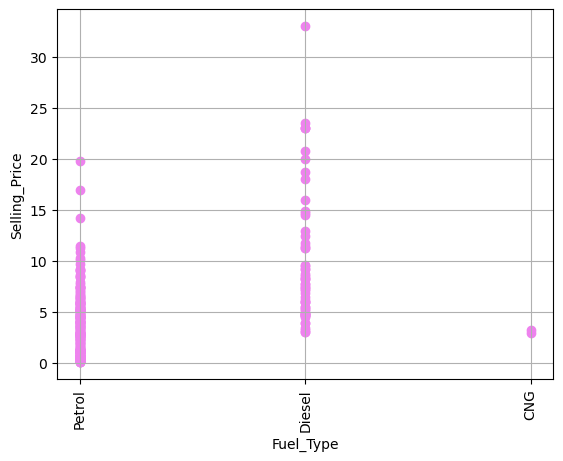

In [61]:
plt.scatter(car_df2["Fuel_Type"] , car_df2["Selling_Price"] , color='violet')
plt.xlabel("Fuel_Type")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

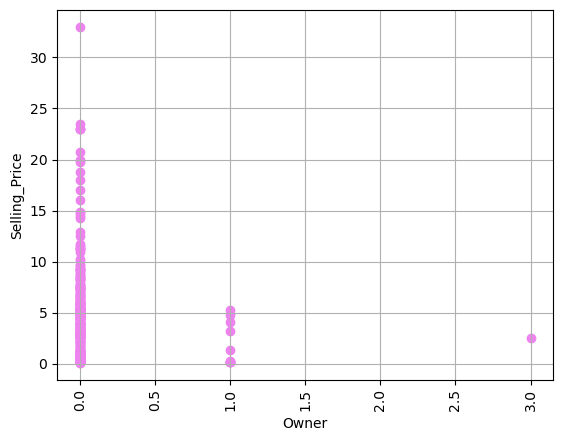

In [62]:
plt.scatter(car_df2["Owner"] , car_df2["Selling_Price"] , color='violet')
plt.xlabel("Owner")
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

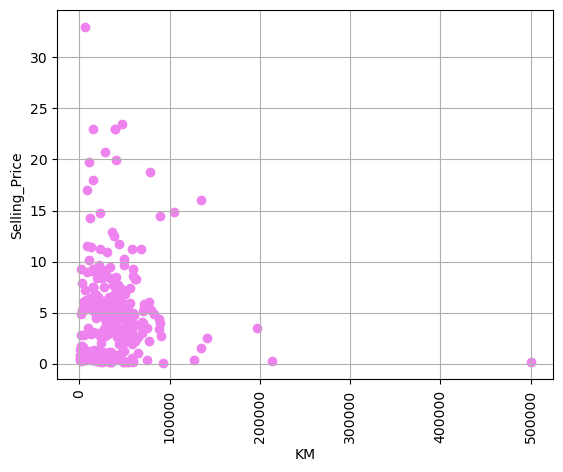

In [63]:
plt.scatter(car_df2["Kms_Driven"] , car_df2["Selling_Price"] , color='violet')
plt.xlabel('KM')
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

In [64]:
k=car_df1[(car_df1['Kms_Driven']>=500000)].index
k

Index([196], dtype='int64')

In [65]:
car_df3 = car_df2.drop(k)
car_df3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


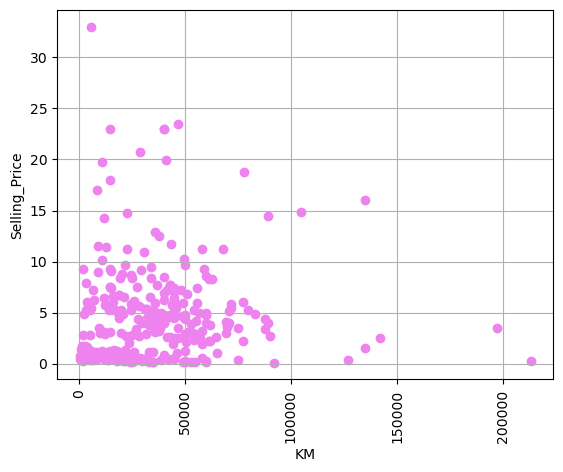

In [66]:
plt.scatter(car_df3["Kms_Driven"] , car_df3["Selling_Price"] , color='violet')
plt.xlabel('KM')
plt.xticks(rotation = 90)
plt.ylabel("Selling_Price")
plt.grid()

# Converting descriptive data to numerical data 
#                       

In [67]:
car_df3.loc[car_df3['Fuel_Type'] == "Petrol", 'Fuel_Type'] = 2
car_df3.loc[car_df3['Fuel_Type'] == "Diesel", 'Fuel_Type'] = 3
car_df3.loc[car_df3['Fuel_Type'] == "CNG", 'Fuel_Type'] = 3


car_df3.loc[car_df3['Transmission'] == "Manual", 'Transmission'] = 2
car_df3.loc[car_df3['Transmission'] == "Automatic", 'Transmission'] = 3


car_df3.loc[car_df3['Seller_Type'] == "Dealer", 'Seller_Type'] = 2
car_df3.loc[car_df3['Seller_Type'] == "Individual", 'Seller_Type'] = 3


### Changing astype to int

In [68]:
car_df3["Fuel_Type"] = car_df3['Fuel_Type'].astype('int64')
car_df3["Transmission"] = car_df3['Transmission'].astype('int64')
car_df3["Seller_Type"] = car_df3['Seller_Type'].astype('int64')

In [69]:
car_df3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [70]:
car_df3.dtypes

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
age                int64
dtype: object

In [71]:
#sort by age
car_df3.sort_values(by='age', inplace=True)
car_df3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,2071,3,2,2,0,1
64,33.00,36.23,6000,3,2,3,0,2
129,0.78,0.84,5000,2,3,2,0,2
128,0.80,0.87,3000,2,3,2,0,2
220,3.50,4.43,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...
84,3.49,13.46,197176,3,2,2,0,14
54,2.75,10.21,90000,2,3,2,0,14
77,1.50,12.35,135154,2,2,3,0,15
37,0.35,2.28,127000,2,3,2,0,16


# Correlation

In [73]:
pear_corr=car_df3.corr(method='pearson')
pear_corr.style.background_gradient(cmap='Blues')

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
Selling_Price,1.000000,0.883903,0.062810,0.537184,-0.570043,0.412520,-0.091101,-0.275162
Present_Price,0.883903,1.000000,0.337736,0.489685,-0.591886,0.453428,0.016221,0.014112
Kms_Driven,0.062810,0.337736,1.000000,0.259208,-0.212191,0.087296,0.134016,0.617777
Fuel_Type,0.537184,0.489685,0.259208,1.000000,-0.355065,0.099645,-0.055223,-0.065955
Seller_Type,-0.570043,-0.591886,-0.212191,-0.355065,1.000000,-0.076886,0.125139,0.034617
Transmission,0.412520,0.453428,0.087296,0.099645,-0.076886,1.000000,0.052166,-0.014893
Owner,-0.091101,0.016221,0.134016,-0.055223,0.125139,0.052166,1.000000,0.185671
age,-0.275162,0.014112,0.617777,-0.065955,0.034617,-0.014893,0.185671,1.000000


# present price>  seller type >  fuel type>  transmission>  age>  owner>  kms_ driven

In [74]:
car_df4=car_df3.copy()

### Creat Model

# 80/20

In [75]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [76]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2 , random_state=0)

In [77]:
regressor_80=LinearRegression()
regressor_80.fit(x_train,y_train)

LinearRegression()

In [78]:
result=regressor_80.score(x_test,y_test)
result

0.9131956552869036

In [79]:
y_pred=regressor_80.predict(x_test)

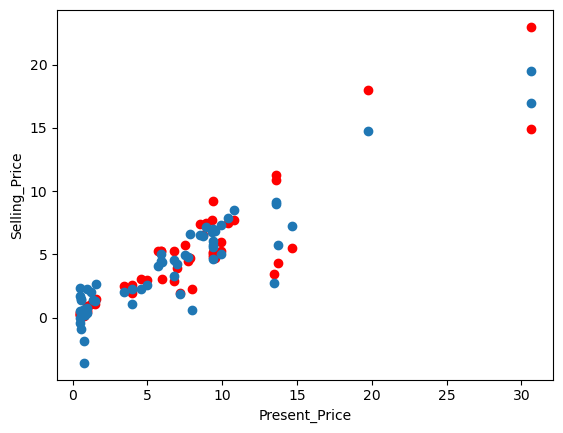

In [80]:
a =x_test.Present_Price
b =y_test
c =x_test.Present_Price
d =y_pred
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

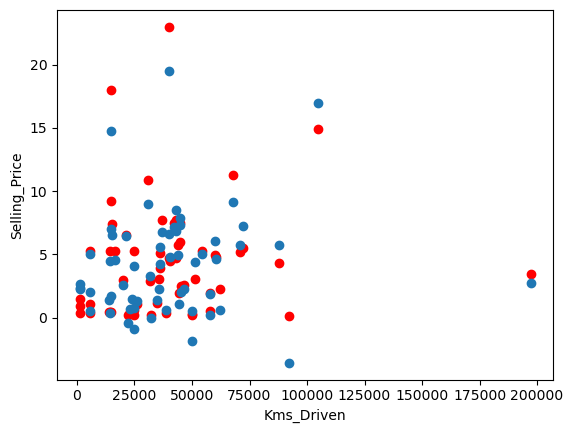

In [81]:
a =x_test.Kms_Driven
b =y_test
c =x_test.Kms_Driven
d =y_pred
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

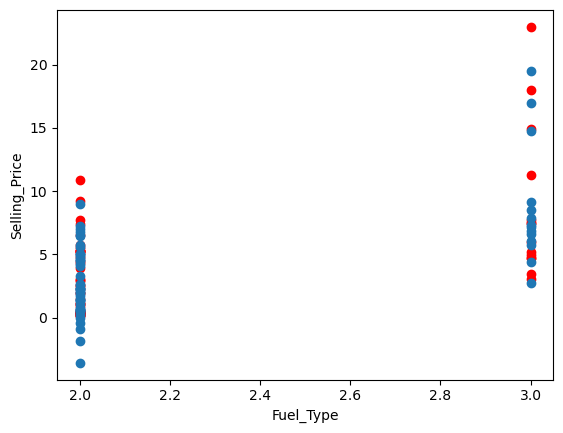

In [82]:
a =x_test.Fuel_Type
b =y_test
c =x_test.Fuel_Type
d =y_pred
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

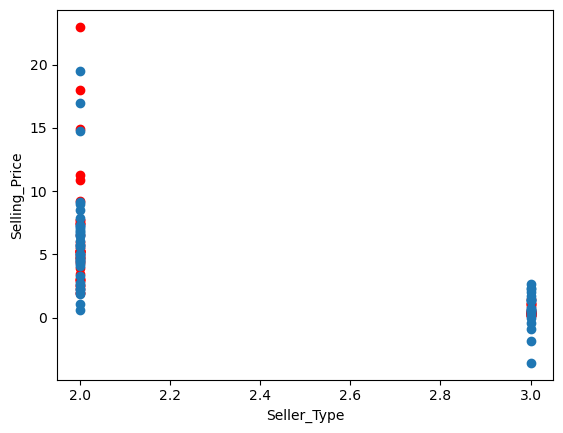

In [83]:
a =x_test.Seller_Type
b =y_test
c =x_test.Seller_Type
d =y_pred
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

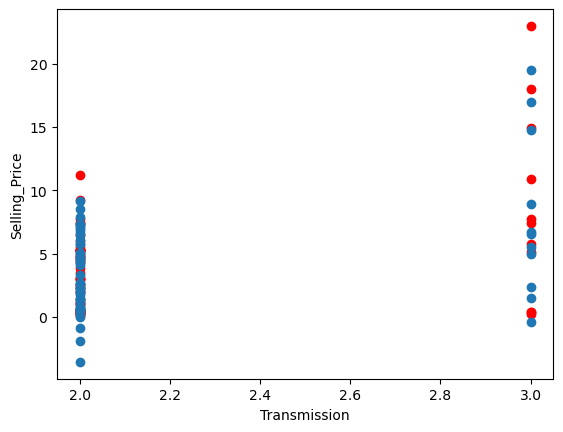

In [84]:
a =x_test.Transmission
b =y_test
c =x_test.Transmission
d =y_pred
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

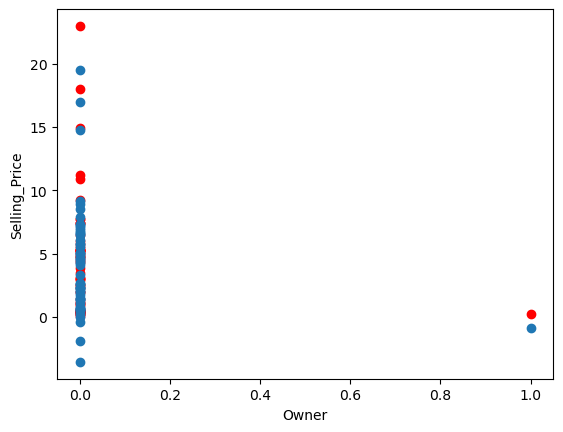

In [85]:
a =x_test.Owner
b =y_test
c =x_test.Owner
d =y_pred
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

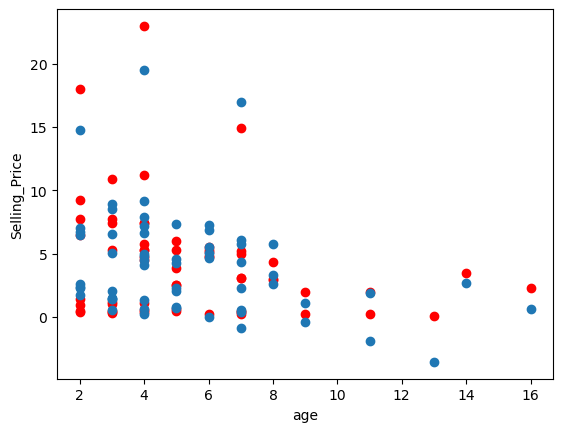

In [86]:
a =x_test.age
b =y_test
c =x_test.age
d =y_pred
plt.xlabel('age')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

In [87]:
print(regressor_80.intercept_)
print(regressor_80.coef_)

[-0.35338336]
[[ 5.51269616e-01 -2.44120647e-05  1.71544948e+00 -4.32193341e-01
   3.17334763e-01 -7.60742847e-01 -3.18496843e-01]]


In [88]:
car_df3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,2071,3,2,2,0,1
64,33.00,36.23,6000,3,2,3,0,2
129,0.78,0.84,5000,2,3,2,0,2
128,0.80,0.87,3000,2,3,2,0,2
220,3.50,4.43,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...
84,3.49,13.46,197176,3,2,2,0,14
54,2.75,10.21,90000,2,3,2,0,14
77,1.50,12.35,135154,2,2,3,0,15
37,0.35,2.28,127000,2,3,2,0,16


Text(0, 0.5, 'Pred')

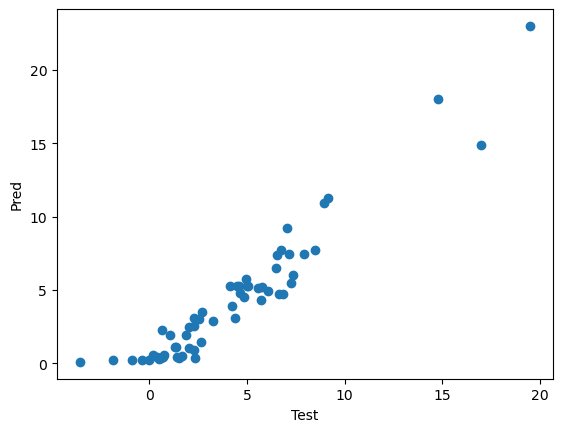

In [89]:
plt.scatter(y_pred,y_test)
plt.xlabel('Test')
plt.ylabel('Pred')

In [90]:
Compare=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
Compare

,Actual,Predict
0,0.25,0.004585
1,5.50,7.271787
2,7.75,6.746188
3,0.45,0.377909
4,0.40,0.509415
5,23.00,19.504476
6,4.95,6.050981
7,5.25,5.070227
8,0.35,1.505783
9,0.38,0.596226


In [91]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9841646445317702
MSE:  1.6860548568242997
RMSE:  1.2984817506704898
R2 Score:  0.9131956552869036


In [92]:
print(regressor_80.intercept_)
print(regressor_80.coef_)

[-0.35338336]
[[ 5.51269616e-01 -2.44120647e-05  1.71544948e+00 -4.32193341e-01
   3.17334763e-01 -7.60742847e-01 -3.18496843e-01]]


# 70/30

In [93]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [94]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3 , random_state=0)

In [95]:
regressor_70=LinearRegression()
regressor_70.fit(x_train,y_train)

LinearRegression()

In [96]:
y_pred=regressor_70.predict(x_test)

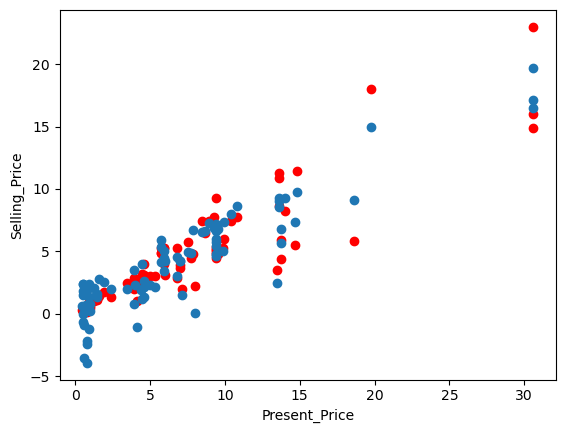

In [97]:
a =x_test.Present_Price
b =y_test
c =x_test.Present_Price
d =y_pred
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

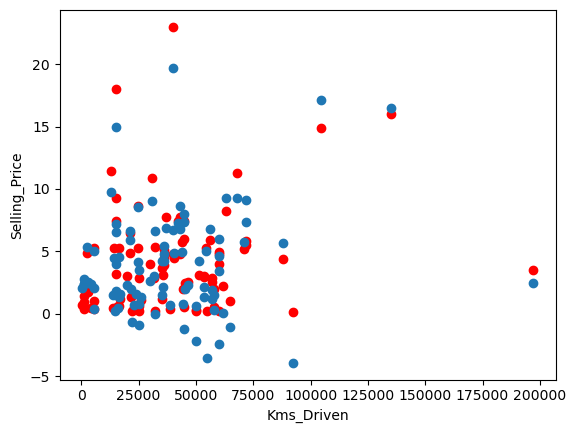

In [98]:
a =x_test.Kms_Driven
b =y_test
c =x_test.Kms_Driven
d =y_pred
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

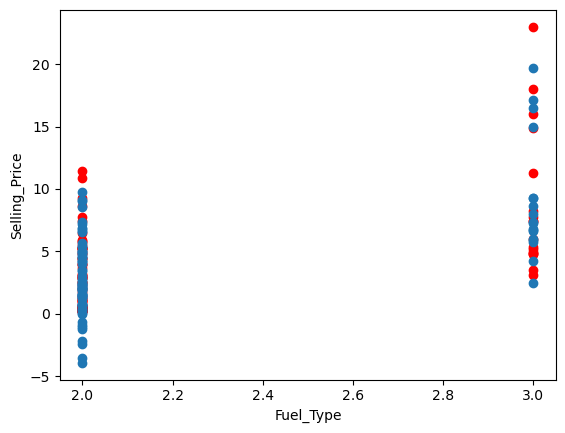

In [99]:
a =x_test.Fuel_Type
b =y_test
c =x_test.Fuel_Type
d =y_pred
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

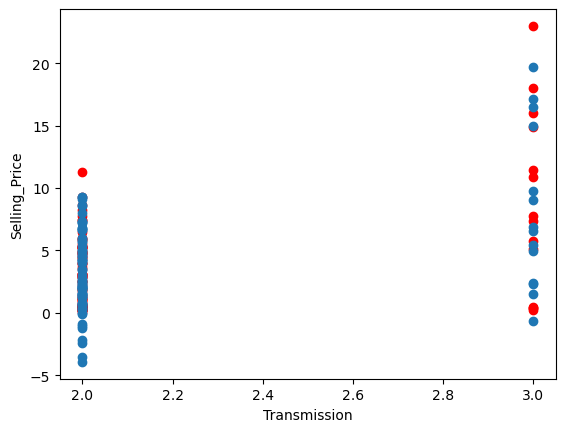

In [100]:
a =x_test.Transmission
b =y_test
c =x_test.Transmission
d =y_pred
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

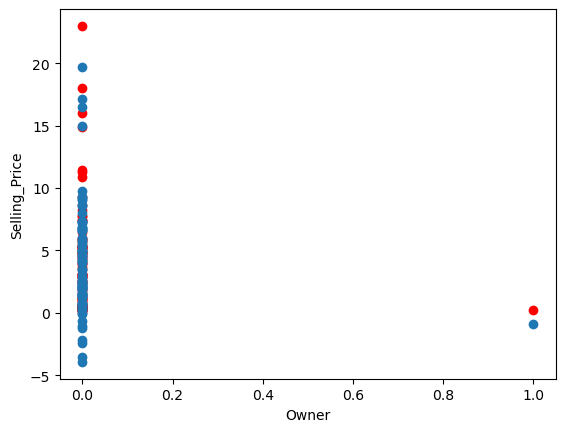

In [101]:
a =x_test.Owner
b =y_test
c =x_test.Owner
d =y_pred
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

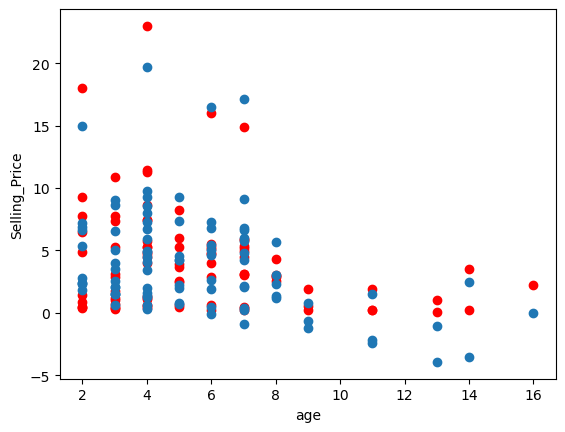

In [102]:
a =x_test.age
b =y_test
c =x_test.age
d =y_pred
plt.xlabel('age')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

In [103]:
Compare1=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
Compare1

,Actual,Predict
0,0.25,-0.054138
1,5.50,7.313141
2,7.75,6.851784
3,0.45,0.239623
4,0.40,0.356057
...,...,...
85,2.85,3.498388
86,2.90,1.896286
87,5.90,6.775654
88,2.95,1.328064


In [104]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  1.0891855328714417
MSE:  1.921574548341343
RMSE:  1.386208695810751
R2 Score:  0.8878356483098224


In [105]:
print(regressor_70.intercept_)
print(regressor_70.coef_)

[-0.32967695]
[[ 5.61181292e-01 -2.29136211e-05  1.73383852e+00 -3.31884720e-01
   2.55057199e-01 -6.74309559e-01 -3.76594130e-01]]


# 90/10

In [106]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [107]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [108]:
regressor_90=LinearRegression()
regressor_90.fit(x_train,y_train)

LinearRegression()

In [109]:
KFold_val=KFold(7, shuffle=True, random_state=0)

In [110]:
r1=cross_val_score(regressor_90 , x , y , cv =KFold_val)

In [111]:
print(r1)
print(np.mean(r1))

[0.92477664 0.87571754 0.78504903 0.89950159 0.85133353 0.84431666
 0.8436851 ]
0.8606257278161433


In [112]:
y_pred=regressor_90.predict(x_test)

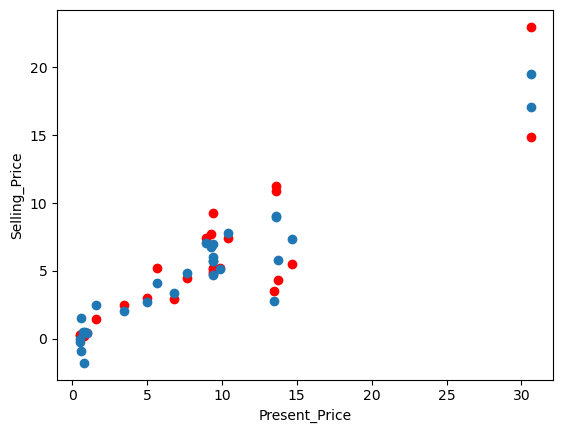

In [113]:
a =x_test.Present_Price
b =y_test
c =x_test.Present_Price
d =y_pred
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

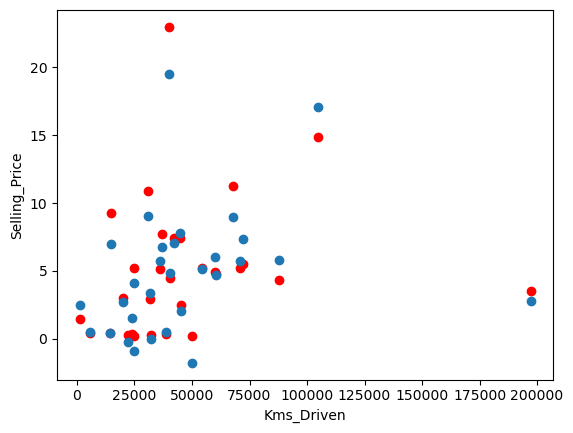

In [114]:
a =x_test.Kms_Driven
b =y_test
c =x_test.Kms_Driven
d =y_pred
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

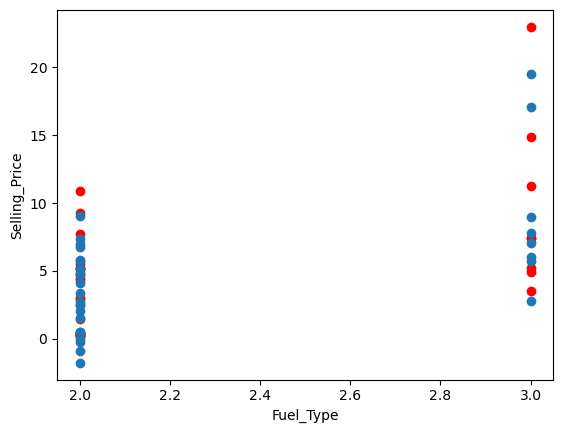

In [115]:
a =x_test.Fuel_Type
b =y_test
c =x_test.Fuel_Type
d =y_pred
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

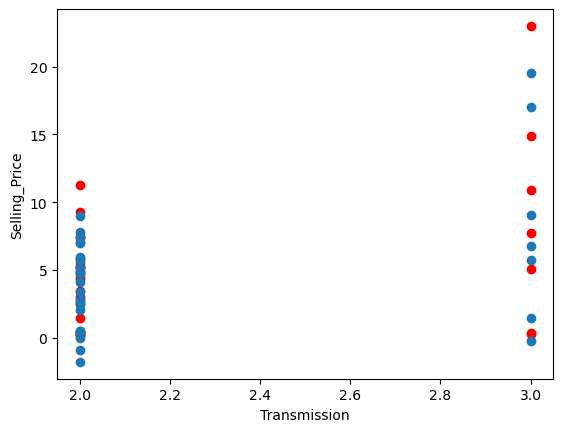

In [116]:
a =x_test.Transmission
b =y_test
c =x_test.Transmission
d =y_pred
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

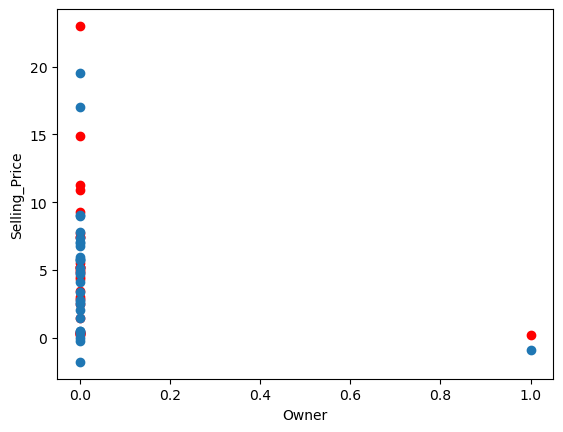

In [117]:
a =x_test.Owner
b =y_test
c =x_test.Owner
d =y_pred
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

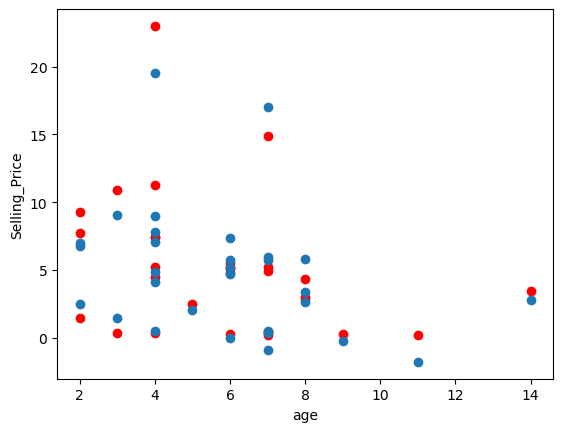

In [118]:
a =x_test.age
b =y_test
c =x_test.age
d =y_pred
plt.xlabel('age')
plt.ylabel('Selling_Price')
plt.scatter(a,b ,color='red')
plt.scatter(c,d)

In [119]:
Compare1=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
Compare1

,Actual,Predict
0,0.25,-0.023109
1,5.50,7.332350
2,7.75,6.794412
3,0.45,0.386207
4,0.40,0.521159
5,23.00,19.533509
6,4.95,5.998446
7,5.25,5.125293
8,0.35,1.496213
9,0.38,0.512036


In [120]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.972049416779598
MSE:  1.6365877093753483
RMSE:  1.2792918781010643
R2 Score:  0.9336511490716906


In [121]:
print(regressor_90.intercept_)
print(regressor_90.coef_)

[-0.26180918]
[[ 5.54024266e-01 -2.48439836e-05  1.58460172e+00 -4.98694200e-01
   4.13173014e-01 -8.17990411e-01 -2.91385238e-01]]


# Add the power of two columns based on correlation

In [122]:
Present_Price2= car_df3.Present_Price**2
car_df3.insert(2,'Present_Price2',Present_Price2)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [123]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [124]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [125]:
reg1=LinearRegression()
reg1.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred=reg1.predict(x_test)

In [127]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9549117454428384
MSE:  1.6550825768183586
RMSE:  1.2865001270183998
R2 Score:  0.9329013492315197


In [128]:
Seller_Type= car_df3.Seller_Type**2
car_df3.insert(6,'Seller_Type2',Seller_Type)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Seller_Type2,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,4,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,4,3,0,2
129,0.78,0.84,0.7056,5000,2,3,9,2,0,2
128,0.80,0.87,0.7569,3000,2,3,9,2,0,2
220,3.50,4.43,19.6249,38488,2,2,4,2,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,4,2,0,14
54,2.75,10.21,104.2441,90000,2,3,9,2,0,14
77,1.50,12.35,152.5225,135154,2,2,4,3,0,15
37,0.35,2.28,5.1984,127000,2,3,9,2,0,16


In [129]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Seller_Type','Seller_Type2','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [130]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [131]:
reg2=LinearRegression()
reg2.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred=reg2.predict(x_test)

In [133]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9549117454428385
MSE:  1.6550825768183597
RMSE:  1.2865001270184002
R2 Score:  0.9329013492315197


In [134]:
#It had no effect
car_df3.drop(columns='Seller_Type2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [135]:
Fuel_Type= car_df3.Fuel_Type**2
car_df3.insert(5,'Fuel_Type2',Fuel_Type)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Fuel_Type2,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,9,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,9,2,3,0,2
129,0.78,0.84,0.7056,5000,2,4,3,2,0,2
128,0.80,0.87,0.7569,3000,2,4,3,2,0,2
220,3.50,4.43,19.6249,38488,2,4,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,9,2,2,0,14
54,2.75,10.21,104.2441,90000,2,4,3,2,0,14
77,1.50,12.35,152.5225,135154,2,4,2,3,0,15
37,0.35,2.28,5.1984,127000,2,4,3,2,0,16


In [136]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Fuel_Type2','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [137]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [138]:
reg3=LinearRegression()
reg3.fit(x_train,y_train)

LinearRegression()

In [139]:
y_pred=reg3.predict(x_test)

In [140]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.954911745442839
MSE:  1.6550825768183577
RMSE:  1.2865001270183993
R2 Score:  0.9329013492315198


In [141]:
#It had no effect
car_df3.drop(columns='Fuel_Type2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [142]:
Transmission2= car_df3.Transmission**2
car_df3.insert(7,'Transmission2',Transmission2)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Transmission2,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,4,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,9,0,2
129,0.78,0.84,0.7056,5000,2,3,2,4,0,2
128,0.80,0.87,0.7569,3000,2,3,2,4,0,2
220,3.50,4.43,19.6249,38488,2,2,2,4,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,4,0,14
54,2.75,10.21,104.2441,90000,2,3,2,4,0,14
77,1.50,12.35,152.5225,135154,2,2,3,9,0,15
37,0.35,2.28,5.1984,127000,2,3,2,4,0,16


In [143]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Transmission2','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [144]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [145]:
reg4=LinearRegression()
reg4.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred=reg4.predict(x_test)

In [147]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9549117454428391
MSE:  1.6550825768183561
RMSE:  1.2865001270183987
R2 Score:  0.9329013492315198


In [148]:
result4=reg4.score(x_test,y_test)
result4

0.9329013492315198

In [149]:
#It had no effect
car_df3.drop(columns='Transmission2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [150]:
age2= car_df3.age**2
car_df3.insert(9,'age2',Transmission2)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age,age2
5,9.25,9.83,96.6289,2071,3,2,2,0,1,4
64,33.00,36.23,1312.6129,6000,3,2,3,0,2,9
129,0.78,0.84,0.7056,5000,2,3,2,0,2,4
128,0.80,0.87,0.7569,3000,2,3,2,0,2,4
220,3.50,4.43,19.6249,38488,2,2,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14,4
54,2.75,10.21,104.2441,90000,2,3,2,0,14,4
77,1.50,12.35,152.5225,135154,2,2,3,0,15,9
37,0.35,2.28,5.1984,127000,2,3,2,0,16,4


In [151]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age','age2'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [152]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [153]:
reg5=LinearRegression()
reg5.fit(x_train,y_train)

LinearRegression()

In [154]:
y_pred=reg5.predict(x_test)

In [155]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9549117454428395
MSE:  1.6550825768183492
RMSE:  1.286500127018396
R2 Score:  0.9329013492315201


In [156]:
result5=reg5.score(x_test,y_test)
result5

0.9329013492315201

In [157]:
#It had no effect
car_df3.drop(columns='age2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [158]:
Owner2= car_df3.Owner**2
car_df3.insert(8,'Owner2',Owner2)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Owner2,age
5,9.25,9.83,96.6289,2071,3,2,2,0,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,0,16


In [159]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Owner2','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [160]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [161]:
reg6=LinearRegression()
reg6.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred=reg6.predict(x_test)

In [163]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9311633655573609
MSE:  1.6353811779157397
RMSE:  1.2788202289281085
R2 Score:  0.9337000630257031


In [164]:
result6=reg6.score(x_test,y_test)
result6

0.9337000630257031

In [165]:
#It had no effect
car_df3.drop(columns='Owner2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


In [166]:
Kms_Driven2= car_df3.Kms_Driven**2
car_df3.insert(4,'Kms_Driven2',Kms_Driven2)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Kms_Driven2,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,4289041,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,36000000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,25000000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,9000000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,1481326144,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,38878374976,3,2,2,0,14
54,2.75,10.21,104.2441,90000,8100000000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,18266603716,2,2,3,0,15
37,0.35,2.28,5.1984,127000,16129000000,2,3,2,0,16


In [167]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Kms_Driven2','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [168]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [169]:
reg7=LinearRegression()
reg7.fit(x_train,y_train)

LinearRegression()

In [170]:
y_pred=reg7.predict(x_test)

In [171]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  1.0545911019762915
MSE:  1.942894762777502
RMSE:  1.393877599639761
R2 Score:  0.9212331644393691


In [172]:
result7=reg7.score(x_test,y_test)
result7

0.9212331644393691

In [173]:
#It had no effect
car_df3.drop(columns='Kms_Driven2', inplace=True)
car_df3

,Selling_Price,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,6000,3,2,3,0,2
129,0.78,0.84,0.7056,5000,2,3,2,0,2
128,0.80,0.87,0.7569,3000,2,3,2,0,2
220,3.50,4.43,19.6249,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,197176,3,2,2,0,14
54,2.75,10.21,104.2441,90000,2,3,2,0,14
77,1.50,12.35,152.5225,135154,2,2,3,0,15
37,0.35,2.28,5.1984,127000,2,3,2,0,16


# Multiply the name column in high importance columns

In [175]:
Pre_Kms= car_df3['Present_Price']*car_df3['Kms_Driven']
car_df3.insert(3,'Pre_Kms',Pre_Kms)
car_df3

,Selling_Price,Present_Price,Present_Price2,Pre_Kms,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,20357.93,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,217380.00,6000,3,2,3,0,2
129,0.78,0.84,0.7056,4200.00,5000,2,3,2,0,2
128,0.80,0.87,0.7569,2610.00,3000,2,3,2,0,2
220,3.50,4.43,19.6249,170501.84,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,2653988.96,197176,3,2,2,0,14
54,2.75,10.21,104.2441,918900.00,90000,2,3,2,0,14
77,1.50,12.35,152.5225,1669151.90,135154,2,2,3,0,15
37,0.35,2.28,5.1984,289560.00,127000,2,3,2,0,16


In [176]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Pre_Kms','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [177]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [178]:
reg8=LinearRegression()
reg8.fit(x_train,y_train)

LinearRegression()

In [179]:
y_pred=reg8.predict(x_test)

In [180]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.9635489109459062
MSE:  2.0284673907373
RMSE:  1.4242427429119306
R2 Score:  0.9177639672166823


In [181]:
result8=reg8.score(x_test,y_test)
result8

0.9177639672166823

In [182]:
Pre_Fuel= car_df3['Present_Price']*car_df3['Fuel_Type']
car_df3.insert(4,'Pre_Fuel',Pre_Fuel)
car_df3

,Selling_Price,Present_Price,Present_Price2,Pre_Kms,Pre_Fuel,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,20357.93,29.49,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,217380.00,108.69,6000,3,2,3,0,2
129,0.78,0.84,0.7056,4200.00,1.68,5000,2,3,2,0,2
128,0.80,0.87,0.7569,2610.00,1.74,3000,2,3,2,0,2
220,3.50,4.43,19.6249,170501.84,8.86,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
84,3.49,13.46,181.1716,2653988.96,40.38,197176,3,2,2,0,14
54,2.75,10.21,104.2441,918900.00,20.42,90000,2,3,2,0,14
77,1.50,12.35,152.5225,1669151.90,24.70,135154,2,2,3,0,15
37,0.35,2.28,5.1984,289560.00,4.56,127000,2,3,2,0,16


In [183]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Pre_Kms','Pre_Fuel','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price'].values.reshape(-1,1)

In [184]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [185]:
reg9=LinearRegression()
reg9.fit(x_train,y_train)

LinearRegression()

In [186]:
y_pred=reg9.predict(x_test)

In [187]:
Compare6=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
Compare6

,Actual,Predict
0,0.25,0.187342
1,5.50,6.136130
2,7.75,7.224143
3,0.45,0.021971
4,0.40,-0.216747
5,23.00,22.314758
6,4.95,5.482880
7,5.25,5.159149
8,0.35,1.686010
9,0.38,1.005602


In [188]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.8061266805740064
MSE:  1.2523029092274016
RMSE:  1.119063407152339
R2 Score:  0.9492304270859211


In [189]:
result9=reg9.score(x_test,y_test)
result9

0.9492304270859211

## R2 +1.9 is good

In [190]:
x_test.insert (0, 'y_test', y_test)
x_test.insert (0, 'y_pred', y_pred)

# normalize

In [191]:
car_df5= x_test.sort_values(by=['Present_Price'])
car_df5

,y_pred,y_test,Present_Price,Present_Price2,Kms_Driven,Fuel_Type,Pre_Kms,Pre_Fuel,Seller_Type,Transmission,Owner,age
187,0.187342,0.25,0.510,0.260100,32000,2,16320.00,1.020,3,2,0,6
186,-0.131496,0.25,0.520,0.270400,22000,2,11440.00,1.040,3,3,0,9
191,0.412741,0.20,0.570,0.324900,25000,2,14250.00,1.140,3,2,1,7
177,1.686010,0.35,0.570,0.324900,24000,2,13680.00,1.140,3,3,0,3
174,1.005602,0.38,0.720,0.518400,38600,2,27792.00,1.440,3,2,0,4
194,-0.847158,0.20,0.787,0.619369,50000,2,39350.00,1.574,3,2,0,11
170,-0.216747,0.40,0.830,0.688900,5500,2,4565.00,1.660,3,2,0,7
162,0.021971,0.45,0.990,0.980100,14500,2,14355.00,1.980,3,2,0,7
103,1.833834,1.45,1.600,2.560000,1200,2,1920.00,3.200,3,2,0,2
23,2.263492,2.50,3.460,11.971600,45280,2,156668.80,6.920,2,2,0,5


In [192]:
scaler=preprocessing.MinMaxScaler(feature_range=(0,1)) 
normal= scaler.fit_transform(car_df3)
car_df6= pd.DataFrame (normal, columns=[car_df3])
car_df6

,Selling_Price,Present_Price,Present_Price2,Pre_Kms,Pre_Fuel,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,0.278116,0.264829,0.073543,0.004861,0.267006,0.007393,1.0,0.0,0.0,0.0,0.000000
1,1.000000,1.000000,1.000000,0.052543,1.000000,0.025882,1.0,0.0,1.0,0.0,0.066667
2,0.020669,0.014481,0.000460,0.000951,0.009625,0.021176,0.0,1.0,0.0,0.0,0.066667
3,0.021277,0.015316,0.000499,0.000566,0.010180,0.011765,0.0,1.0,0.0,0.0,0.066667
4,0.103343,0.114453,0.014874,0.041198,0.076076,0.178767,0.0,0.0,0.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...
294,0.103040,0.365915,0.137956,0.642224,0.367793,0.925534,1.0,0.0,0.0,0.0,0.866667
295,0.080547,0.275411,0.079345,0.222317,0.183063,0.421176,0.0,1.0,0.0,0.0,0.866667
296,0.042553,0.335004,0.116129,0.403884,0.222675,0.633666,0.0,0.0,1.0,0.0,0.933333
297,0.007599,0.054581,0.003883,0.070011,0.036280,0.595294,0.0,1.0,0.0,0.0,1.000000


# Regression model after normalize

In [193]:
x=pd.DataFrame(car_df3, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Pre_Kms','Pre_Fuel','Seller_Type','Transmission','Owner','age'])
y=car_df3['Selling_Price']

In [194]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1 , random_state=0)

In [195]:
reg10=LinearRegression()
reg10.fit(x_train,y_train)

LinearRegression()

In [196]:
y_pred=reg10.predict(x_test)

In [197]:
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

MAE:  0.8061266805740064
MSE:  1.2523029092274016
RMSE:  1.119063407152339
R2 Score:  0.9492304270859211


In [198]:
print(reg10.intercept_)
print(reg10.coef_)

3.5607725942883186
[ 1.66142313e-01 -8.19055391e-03  1.66365275e-05 -2.27459785e+00
 -4.77353456e-06  3.48512915e-01  2.17281318e-01  6.91792017e-01
  5.72749944e-01 -2.92035536e-01]


In [200]:
Selling_Price=11
Present_Price=11.23
Present_Price2=11.23**2
Pre_Kms= 11.23*42000
Pre_Fuel=11.23*2
Kms_Driven=42000
Fuel_Type=2  
Seller_Type=2   
Transmission= 2 
Owner=1
age= 10
sample_pred= pd.DataFrame ({'Selling_Price':[Selling_Price],
                            'Present_Price':[Present_Price],
                           'Present_Price2':[Present_Price2],
                            'Pre_Kms':[Pre_Kms],
                            'Pre_Fuel':[Pre_Fuel],
                          'Kms_Driven':[Kms_Driven],
                            'Fuel_Type':[Fuel_Type],
                          'Seller_Type':[Seller_Type],
                          'Transmission':[Transmission],
                          'Owner':[Owner],
                            'age':[age]})
sample_pred

,Selling_Price,Present_Price,Present_Price2,Pre_Kms,Pre_Fuel,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,11,11.23,126.1129,471660.0,22.46,42000,2,2,2,1,10


In [201]:
Final_df = pd.concat([car_df3, sample_pred])
Final_df

,Selling_Price,Present_Price,Present_Price2,Pre_Kms,Pre_Fuel,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
5,9.25,9.83,96.6289,20357.93,29.49,2071,3,2,2,0,1
64,33.00,36.23,1312.6129,217380.00,108.69,6000,3,2,3,0,2
129,0.78,0.84,0.7056,4200.00,1.68,5000,2,3,2,0,2
128,0.80,0.87,0.7569,2610.00,1.74,3000,2,3,2,0,2
220,3.50,4.43,19.6249,170501.84,8.86,38488,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
54,2.75,10.21,104.2441,918900.00,20.42,90000,2,3,2,0,14
77,1.50,12.35,152.5225,1669151.90,24.70,135154,2,2,3,0,15
37,0.35,2.28,5.1984,289560.00,4.56,127000,2,3,2,0,16
39,2.25,7.98,63.6804,494760.00,15.96,62000,2,2,2,0,16


In [202]:
train=Final_df.iloc[:299]
test= Final_df.iloc[299:]

In [203]:
x_train=pd.DataFrame(Final_df, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Pre_Kms','Pre_Fuel','Seller_Type','Transmission','Owner','age'])[:299]
y=Final_df['Selling_Price'][:299]
y_train=Final_df['Selling_Price'][:299]
x_test=pd.DataFrame(Final_df, columns=['Present_Price','Present_Price2','Kms_Driven','Fuel_Type','Pre_Kms','Pre_Fuel','Seller_Type','Transmission','Owner','age'])[299:]
reg10.fit(x_train,y_train)

LinearRegression()

In [204]:
y_pred=reg10.predict(x_test)

In [205]:
y_pred

array([5.54510994])

# DONE